# The Sparks Foundation - GRIP - Data Science And Business Analytics - December 2021

# Task 2 :- Prediction Using Unsupervised ML

# Author : Shashikant Shinde

Problem Statement: Prediction Using Unsupervised ML

# Importing Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sb

# Loading the iris dataset

In [3]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()   # First 5 rows will be displayed

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Finding the optimum number of clusters

# Using K-means classification

In [42]:
x = iris_df.iloc[:, [0,1,2,3]].values

from sklearn.cluster import KMeans
wcss = []    # wcss = within cluster sum of squares

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', max_iter=300, n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Plot

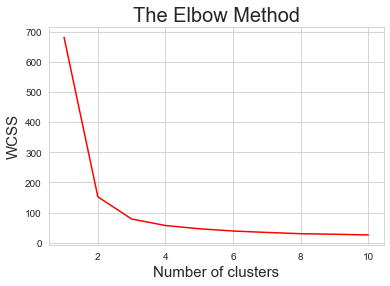

In [52]:
# Plotting the result
sb.set_style("whitegrid")
plt.plot(range(1,11), wcss,"r")
plt.title("The Elbow Method",{'size':20})
plt.xlabel("Number of clusters",{'size':15})
plt.ylabel("WCSS",{'size':15})
plt.show()

# From the above graph we can observe that the elbow has occured at 3.Therefore the optimum cluster value of the within cluster sum of squares (wcss) is 3

In [20]:
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans = kmeans.fit_predict(x)

# Visualising the Data

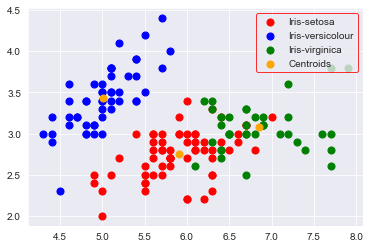

In [41]:
sb.set_style("darkgrid")
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1],s = 50,c = "red",label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1],s = 50,c = "blue",label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1],s = 50,c = "green",label = 'Iris-virginica')

# Plotting the centroid
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=50,c="orange",label="Centroids")

plt.legend(loc = "upper right",edgecolor="red")